In [1]:
from google.colab import files
import os

uploaded = files.upload()

# Get the name of the uploaded file
terrain = list(uploaded.keys())[0]

# Unzip the file
!unzip -q "{terrain}"

print(f"Successfully unzipped {terrain}!")
#see the unzipped folder
!ls

Saving terrain.zip to terrain.zip
Successfully unzipped terrain.zip!
'Dataset 1.0'   sample_data   terrain.zip


In [2]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
base_dir = 'Dataset 1.0'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

print("Base directory contents:", os.listdir(base_dir))
print("-" * 30)
print("Training directory contents:", os.listdir(train_dir))
print("Validation directory contents:", os.listdir(validation_dir))
print("Test directory contents:", os.listdir(test_dir))

Base directory contents: ['validation', 'test', 'train']
------------------------------
Training directory contents: ['Mountains', 'Forest Cover', 'Deserts']
Validation directory contents: ['Mountains', 'Forest Cover', 'Deserts']
Test directory contents: ['Mountains', 'Forest Cover', 'Deserts']


In [5]:
#count the files in each directory
for dir_name, dir_path in [('Train', train_dir), ('Validation', validation_dir), ('Test', test_dir)]:
    print(f"\n--- {dir_name} Set ---")
    for class_name in os.listdir(dir_path):
        class_path = os.path.join(dir_path, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            print(f"Class '{class_name}': {num_images} images")


--- Train Set ---
Class 'Mountains': 2002 images
Class 'Forest Cover': 2002 images
Class 'Deserts': 2002 images

--- Validation Set ---
Class 'Mountains': 195 images
Class 'Forest Cover': 195 images
Class 'Deserts': 195 images

--- Test Set ---
Class 'Mountains': 195 images
Class 'Forest Cover': 195 images
Class 'Deserts': 195 images


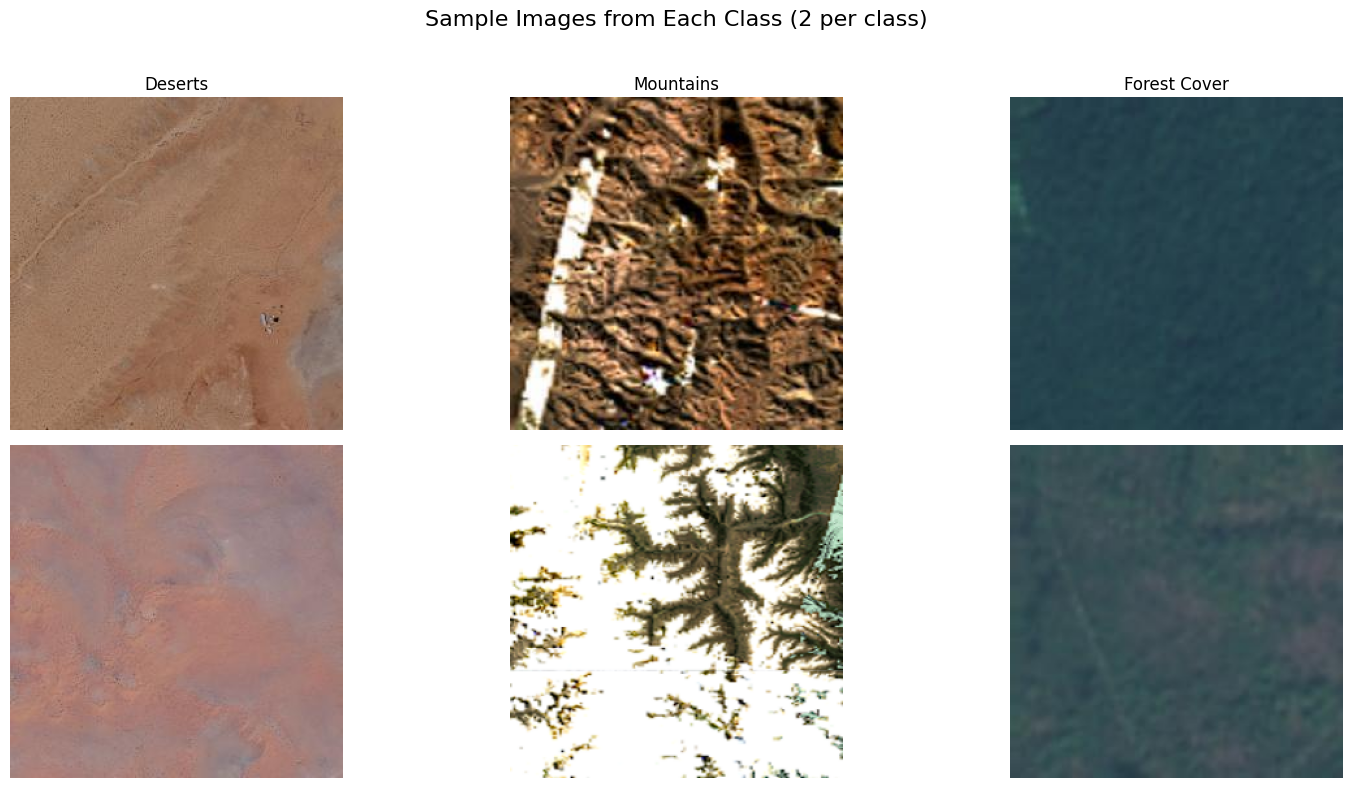

In [11]:
import cv2
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle('Sample Images from Each Class (2 per class)', fontsize=16)

class_names = ['Deserts', 'Mountains', 'Forest Cover']

for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)
    all_images = os.listdir(class_path)

    # Pick two random, unique images
    random_samples = random.sample(all_images, 2)

    # Display the first sample
    img_path1 = os.path.join(class_path, random_samples[0])
    img1 = Image.open(img_path1)
    axes[0, i].imshow(img1)
    axes[0, i].set_title(class_name)
    axes[0, i].axis('off')

    # Display the second sample
    img_path2 = os.path.join(class_path, random_samples[1])
    img2 = Image.open(img_path2)
    axes[1, i].imshow(img2)
    axes[1, i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

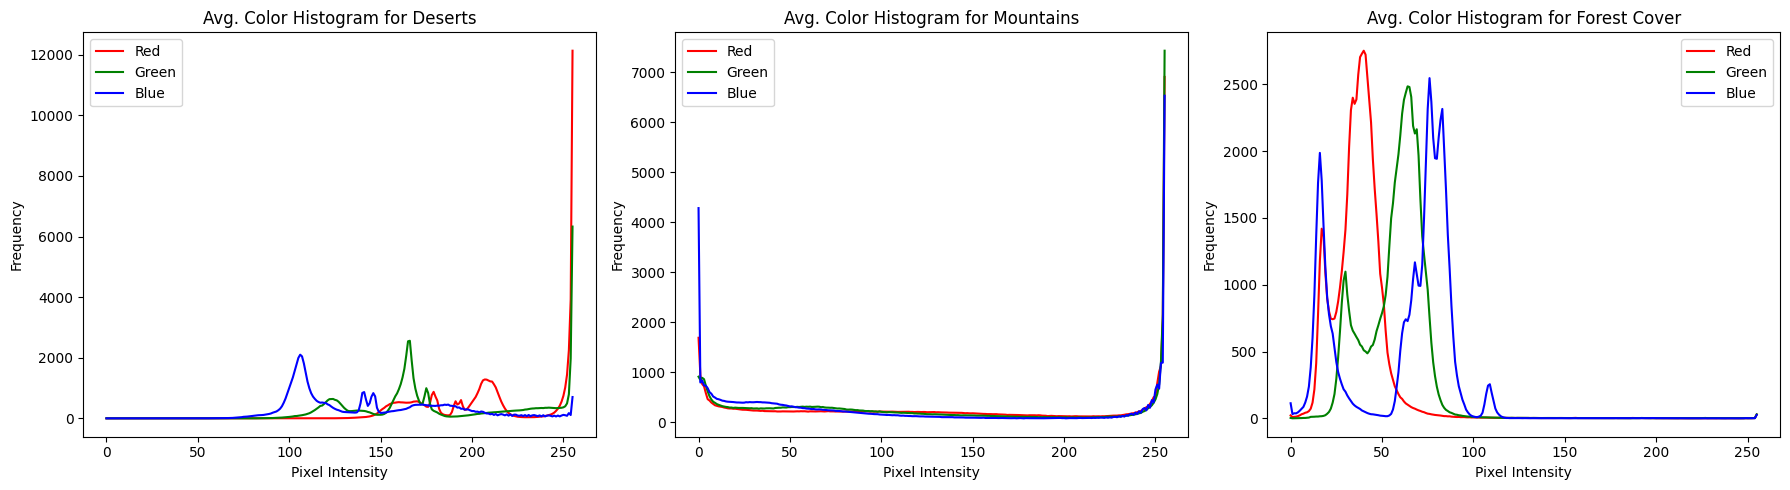

In [12]:
def plot_class_histograms(class_name, num_samples=50):
    """Calculates and plots the average color histogram for a given class."""
    class_path = os.path.join(train_dir, class_name)
    image_files = random.sample(os.listdir(class_path), num_samples)

    # Initialize arrays to store total histogram values
    h_b, h_g, h_r = (np.zeros(256) for _ in range(3))

    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        # Split image into B, G, R channels
        b, g, r = cv2.split(img)

        # Calculate histogram for each channel and add to total
        h_b += cv2.calcHist([b], [0], None, [256], [0, 256]).flatten()
        h_g += cv2.calcHist([g], [0], None, [256], [0, 256]).flatten()
        h_r += cv2.calcHist([r], [0], None, [256], [0, 256]).flatten()

    # Plot the average histograms
    plt.plot(h_r / num_samples, color='red', label='Red')
    plt.plot(h_g / num_samples, color='green', label='Green')
    plt.plot(h_b / num_samples, color='blue', label='Blue')
    plt.title(f'Avg. Color Histogram for {class_name}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()

# Plot histograms for all three classes
plt.figure(figsize=(18, 5))
for i, class_name in enumerate(class_names):
    plt.subplot(1, 3, i + 1)
    plot_class_histograms(class_name)
plt.tight_layout()
plt.show()